<a href="https://colab.research.google.com/github/Surajpatra700/Deep-Learning_Project/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# COMPUTER VISION ---> Its a field of Deep Learning in which the machine interprets Visual images/ videos similar to that of Human Eyes

In [ ]:
# FILTERS --->(Feature Detectors)

# In a Convolutional Neural Network (CNN), filters are small, learnable, and typically 2D arrays used to extract features from input data,
# such as images. These filters slide (convolve) over the input, element-wise multiplying and summing values.
# They help detect patterns like edges, textures, or more complex features in the data, enabling the network to learn hierarchical representations.
# The output of these convolutions is often referred to as feature maps, which serve as input for subsequent layers in the CNN, ultimately aiding in tasks like image recognition.

In [ ]:
# POOLING -->

# Pooling in a Convolutional Neural Network (CNN) is a downsampling operation that reduces the spatial dimensions of feature maps
# while retaining their important information. It involves sliding a window (usually 2x2 or 3x3) over the input, and for each window,
# taking the maximum (MaxPooling) or average (AveragePooling) value. This reduces the computational load and helps make the network more robust to small spatial translations,
# enhancing its ability to recognize patterns in different parts of the image. Pooling helps reduce the number of parameters and control overfitting in the network.

In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [21]:
X_test.shape

(10000, 32, 32, 3)

In [27]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [45]:
y_train = y_train.reshape(-1,) # Reducing the two dimension array to one-Dimemsion array
y_train[:5]
# y_test[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [42]:
def plot_image(X,y,index):
  plt.figure(figsize=(10,2))
  #plt.xlabel(classes[y_test[index][0]])
  plt.xlabel(classes[y[index]])
  return plt.imshow(X[index])

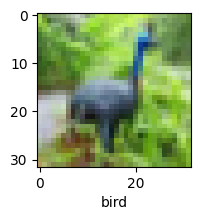

In [47]:
plot_image(X_train, y_train, 6)

In [48]:
X_train = X_train/255
y_train = y_train/255

In [51]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="sigmoid"),
])

ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 216s 138ms/step - loss: 0.0030 - accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 190s 121ms/step - loss: 3.1041e-04 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 173s 110ms/step - loss: 1.9810e-04 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.4815e-04 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.1931e-04 - accuracy: 0.1000


In [ ]:
ann.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_metrics, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
